In [1]:
import gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import trange

In [4]:
env = gym.make('FrozenLake-v1', render_mode='human')
env.reset()

env.close()

In [5]:
env.observation_space

Discrete(16)

In [6]:
env.action_space

Discrete(4)

In [7]:
env.P[2][1]

[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 6, 0.0, False),
 (0.3333333333333333, 3, 0.0, False)]

In [16]:
discountFactor = 0.9
valueFunctionVector = np.zeros(env.observation_space.n)
max_iteration = 1000
covergenceTolerance = 10**(-6)
covergenceTrack=[]

for iteration in range(max_iteration):
    covergenceTrack.append(np.linalg.norm(valueFunctionVector, 2))
    valueFunctionVectorNextIteration = np.zeros(env.observation_space.n)
    
    for state in env.P:
        out_sum =0
        for action in env.P[state]:
            inner_sum =0
            for probability, nextState, reward, isTerminal in env.P[state][action]:
                inner_sum = inner_sum + probability*(reward+discountFactor*valueFunctionVector[nextState])
            out_sum = out_sum + 0.25*inner_sum
        valueFunctionVectorNextIteration[state] = out_sum
    if (np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))) < covergenceTolerance:
        print("Converged")
        break
    valueFunctionVector = valueFunctionVectorNextIteration

Converged


In [21]:
valueFunctionVector

array([0.00447375, 0.00421997, 0.01006456, 0.00411652, 0.00671989,
       0.        , 0.02633284, 0.        , 0.01867491, 0.05760625,
       0.10697128, 0.        , 0.        , 0.13038247, 0.3914896 ,
       0.        ])

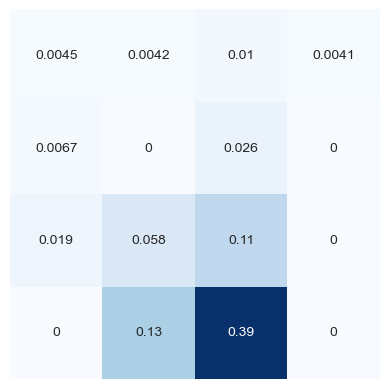

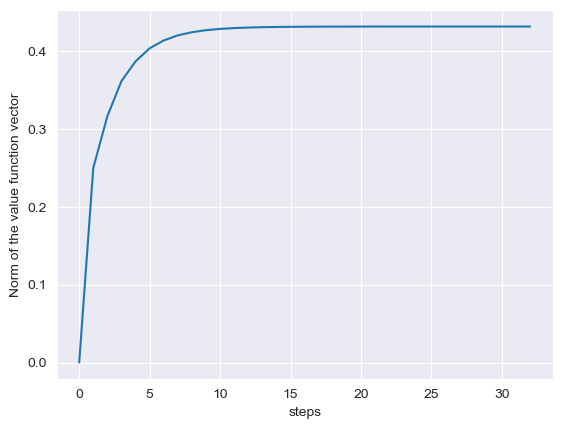

In [20]:
def grid_print(valueFunction, reshapeDim):
    ax = sns.heatmap(valueFunction.reshape(4,4),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)
    plt.grid()
    plt.savefig('ValueFunction_IterativePolicy', dpi=600)
    plt.show()
grid_print(valueFunctionVector,4)
plt.plot(covergenceTrack)
plt.xlabel('steps')
plt.ylabel('Norm of the value function vector')
plt.savefig('convergence.png',dpi=600)
plt.show()